In [59]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Learning rate

In [73]:
def load_learning(folder, results=30):
    resultados = pd.DataFrame()
    
    for i in range(results):
        resultado = pd.read_csv('results/{}/learning_{}.csv'.format(folder, i), index_col=0)
        resultados[i] = resultado['pseudo-likelihood']

    return resultados

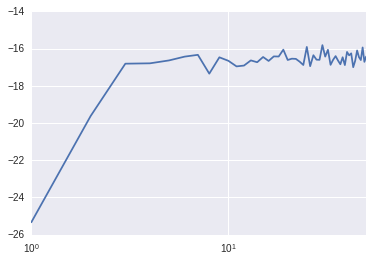

In [77]:
resultados = load_learning(50, 30)
plot = resultados.mean(axis=1).plot()
plot.set_xscale('log')

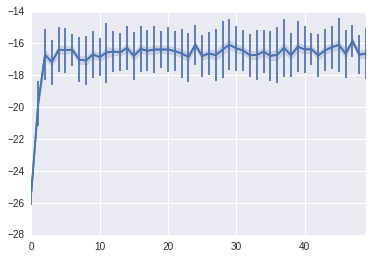

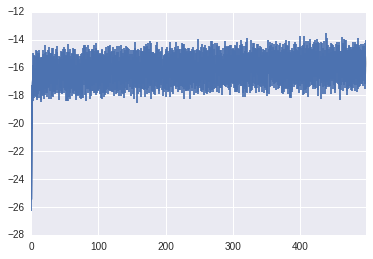

UnboundLocalError: local variable 'x' referenced before assignment

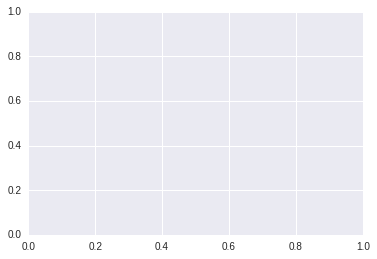

In [78]:
def plot_learning_rate(resultados):
    ax = sns.tsplot(data=resultados.T.values)#, err_style="unit_traces")

    mean = resultados.T.mean()
    std  = resultados.T.std()
    ax.errorbar(resultados.index-1, mean, yerr=std)

    plt.show()

plot_learning_rate(load_learning(50, 30))
plot_learning_rate(load_learning(500, 30))
plot_learning_rate(load_learning(5000, 0))

## Results

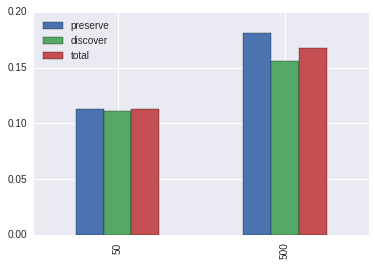

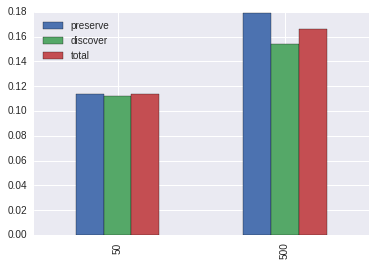

In [79]:
def load_results(folder, file='train', results=30):
    loaded = pd.DataFrame(columns=('preserve', 'discover', 'total'))
    
    read_file = lambda folder, i: pd.read_csv('results/{}/result_{}_{}.csv'.format(folder, file, i), index_col=0)
    return pd.concat([read_file(folder, i) for i in range(results)])

def plot_results(file):
    results_train = pd.DataFrame(columns=('preserve', 'discover', 'total'))
    results_train.loc[50] = load_results(50, file, 30).mean()
    results_train.loc[500] = load_results(500, file, 30).mean()

    ax = results_train.plot.bar()
    ax.errorbar(x, y, yerr=[yerr_lower, 2*yerr], xerr=xerr,
            fmt='o', ecolor='g', capthick=2)

plot_results('train')
plot_results('test')